<a href="https://colab.research.google.com/github/VladimirPakhomov2000/Base-syntaxis-Python/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2_(%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0)%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Распределения и их функции плотности

Задача 1

Из пункта A ведётся стрельба из орудия вдоль прямой X. Предполагается, что дальность полёта распределена нормально с математическим ожиданием 1000 м и средним квадратическим отклонением 5 м. Определить сколько снарядов упадёт с перелётом от 5 до 70м.

In [ ]:
from scipy.stats import norm    # импортируем модуль нормального распределения
from scipy.stats import uniform # импортируем модуль равномерного распределения
import matplotlib.pyplot as plt
import numpy as np

# Зададим распределение со значением мат. ожидания 1000 и std 5
dist = norm(loc=1000, scale=5)

# Найдем вероятность что снаряд перелетит от 5 до 70 метров, 
# как разницу вероятности, что он пролетит 70 и вероятности что он пролетит 5
dist.cdf(1070) - dist.cdf(1005)

0.15865525393145707

Задача 2

Диаметр подшипников, изготовленных на заводе, представляет собой случайную величину, распределенную нормально с математическим ожиданием 1.8 см и средним квадратическим отклонением 0.075 см. Найти вероятность того, что размер наугад взятого подшипника колеблется от 1.7 до 1.85 см.

In [ ]:
# Зададим значения
mu = 1.8
sigm = 0.075

# Зададим функцию нормального распределения
dist = norm(loc=mu, scale=sigm)

# Вероятность того, что размер будет от 1.7 до 1.85
dist.cdf(1.85) - dist.cdf(1.7)

0.6562962427272097

Задача 3

Непрерывная случайная величина X имеет одинаковую плотность распредления A на промежутке (-1,3) и нулевую плотность вне этого промежутка. Найти A, мат. ожидание и дисперсию.

In [ ]:
# Так как случайная величина имеет константную плотность распределения
# на заданном промежутке и 0 вне его, перед нами равномерное распределение
a=-1
b=3

A = 1/(b-a)      # плотность распределения
E = (a+b)/2      # мат.ожидание
D = (b-a)**2 /12 # дисперсия

print("Плотность распределния: {}".format(A))
print("Мат ожидание: {}".format(E))
print("Дисперсия: {}".format(D))

Плотность распределния: 0.25
Мат ожидание: 1.0
Дисперсия: 1.3333333333333333


Задача 4

Цена деления шкалы измерительного прибора равна 0.2. Показания прибора округляются до ближайшего целого деления. Считая, что погрешности округлений распределены равномерно, найти вероятность того, что при очередном измерении она не превзойдёт 0.03.

In [ ]:
from scipy.stats import uniform # стандартная форма распределения от [0, 1]

# Вероятность того, что значение в интервале [0, 0.03]
p1 = uniform(0,0.2).cdf(0.03) 

# Вероятность что значение в интервале [0.17, 0.2]
p2 = 1 - uniform(0,0.2).cdf(0.2-0.03) 

# Вероятность что не превзойдет 0.03
P = p1+p2 

print("Искомая вероятность: {}%".format(round(100*P,2))) 

Искомая вероятность: 30.0%


## Квантили, перцентили и моменты

Задача 5

Для нормального распределения со средним 0.5 и стандартным отклонением 1, найти: 

а) Среднее и дисперсию;

б) 10 и 70 перцентили (0.1 и 0.7 квантили).

In [ ]:
mu = 0.5
std = 1
nor_d = norm(mu,std) # нормальное распределение
mean, var = nor_d.stats(moments='mv') # получим среднее и дисперсию 
print("Среднее: {}".format(mean))
print("Дисперсия: {}".format(var))

Среднее: 0.5
Дисперсия: 1.0


In [ ]:
print("Перцентиль 10: {}".format(nor_d.ppf(0.1))) # посмотрим на квантиль 0.1
print("Перцентиль 70: {}".format(nor_d.ppf(0.7))) # посмотрим на квантиль 0.7

Перцентиль 10: -0.7815515655446004
Перцентиль 70: 1.0244005127080407


## Визуализация распределений


Постройте графики cdf и pdf для рапределения из задачи 5.

In [ ]:
# Задаем функцию плотности
mu = 0.5
std = 1
nor_d = norm(mu,std)

# Задаем пространство точек
vars = np.linspace(-5, 5, 100)

# Считает pdf для каждой точки
prob = nor_d.pdf(vars)

# Считает cdf для каждой точки
prob_2 = nor_d.cdf(vars)

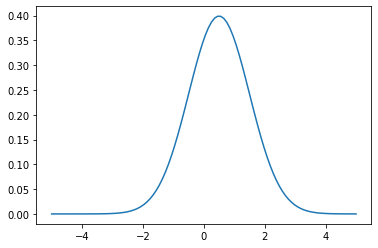

In [ ]:
# Выводим график плотности распределения
plt.plot(vars, prob)
plt.show()

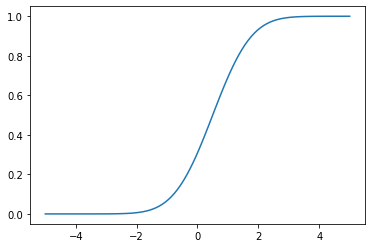

In [ ]:
# Выводим график функции распределения
plt.plot(vars, prob_2)
plt.show()

**Глоссарий**



Пусть m - количество элементарных событий, благоприятствующих событию А

Пусть n  - общее число равновозможных элементарных исходов.

Тогда нахождение вероятности события: 

>**P(A) = m/n**
----
**Сумма вероятностей всех исходов *всегда* равна *1***

Самый очевидный пример - бросок монеты. 

A - выпадет орел

B - выпадет решка

Тогда вероятность всех исходов будет : 
>**P(A) + P(B) = 1**
-----
Вероятность появления одновременно несовместных (независимых друг от друга событий) событий.

==== эквивалентно логическому И ====

>**P(A * B) = P(A) * P(B)**

Пример:
Вероятности попадания в цель при стрельбе первого и второго орудий. Найти вероятность попадания при одном залпе обоими орудиями **одновременно**.

------
Вероятность появления одного из несовместных (событий, зависимых друг от друга) событий.

==== эквивалентно логическому ИЛИ ====

>**P(A + B) = P(A) + P(B)**

Пример:
На охоте произведены два выстрела. Событие А – попадание в цель с первого выстрела, событие В – попадание со второго выстрела, событие (А + В) – попадание с первого **или** второго выстрела **или** с двух выстрелов.

-----

*Теорема сложения совместных событий*.

Вероятность появления одного из совместных событий

> **P(A + B) = P(A) + P(B) - P(A * B)**

